### Which MOEA is the Best ?

Algorithms to be considered
* SPEA 2
* NSGA 2
* RNSGA2
* MOEA/D (Chebychev , Weighted sum , Penalty Boundary Intersection)
* NSGA 3

Literature Review:
* papers on all these algorithms (Foundational Papers)
* Test Problems Definitions 
* Evaluation Metrics (Strongly Pareto Compliant and Weakly Pareto Compliant)

In [1]:
from pymoo.util.function_loader import is_compiled;print('Compiled Extensions: ', is_compiled())

Compiled Extensions:  True


In [2]:
model_list = []
from pymoo.algorithms.moo.spea2 import SPEA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
problem = DTLZ2(n_obj=2)
algorithm = SPEA2(pop_size=1000)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |     1000 |     19 |  0.2376077069 |  0.3703985297 |  0.0217627810 |  0.3703985297 |  0.2309391898
     2 |     2000 |     25 |  0.1853812518 |  0.3031122544 |  0.0404315758 |  0.3031122544 |  0.1834358738
     3 |     3000 |     30 |  0.1615627723 |  0.2476992109 |  0.0624357191 |  0.2476989409 |  0.1580513979
     4 |     4000 |     17 |  0.1226258126 |  0.1799478167 |  0.0894380255 |  0.1799478038 |  0.0993467127
     5 |     5000 |     29 |  0.0851790827 |  0.1245077953 |  0.1176461081 |  0.1245065771 |  0.0817034212
     6 |     6000 |     31 |  0.0634659154 |  0.0936046171 |  0.1371723816 |  0.0936039034 |  0.0553286379
     7 |     7000 |     45 |  0.0505001229 |  0.0881844105 |  0.1520495307 |  0.0881704396 |  0.0427816968
     8 |     8000 |     50 |  0.0377816074 |  0.0748061591 |  0.1637173270 |  0.0747726784 |  0.0313244213
     9 |     9000 |     57 |  0.03204

KeyboardInterrupt: 

In [31]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(4):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)
    

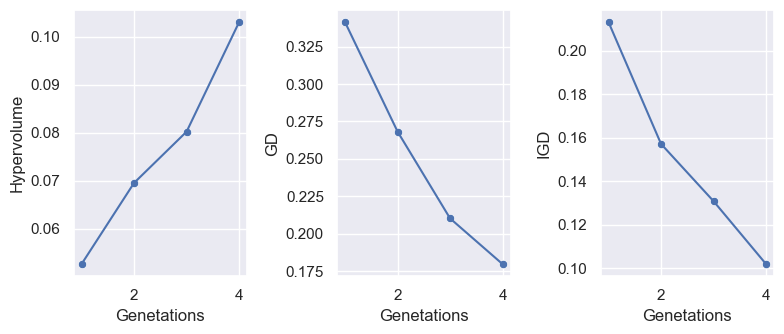

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=[1,2,3,4],y=data_hv_per_gen[0],ax=axes[0])
sns.lineplot(x=[1,2,3,4],y=data_hv_per_gen[0],ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=[1,2,3,4],y=data_gd_per_gen[0],ax=axes[1])
sns.lineplot(x=[1,2,3,4],y=data_gd_per_gen[0],ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=[1,2,3,4],y=data_igd_per_gen[0],ax=axes[2])
sns.lineplot(x=[1,2,3,4],y=data_igd_per_gen[0],ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()

[Text(0.5, 0, 'Genetations'), Text(0, 0.5, 'IGD Plus')]

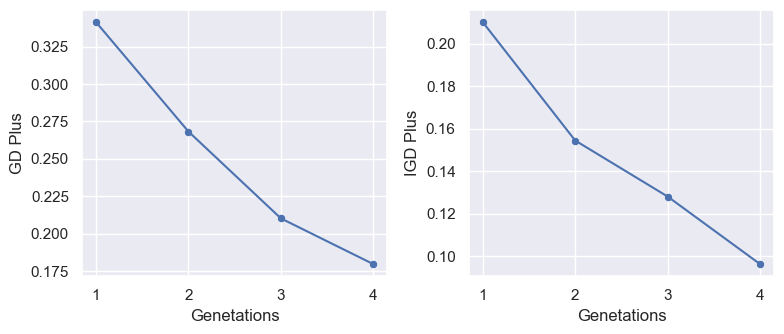

In [44]:
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=[1,2,3,4],y=data_gdpl_per_gen[0],ax=axes[0])
sns.lineplot(x=[1,2,3,4],y=data_gdpl_per_gen[0],ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=[1,2,3,4],y=data_igdpl_per_gen[0],ax=axes[1])
sns.lineplot(x=[1,2,3,4],y=data_igdpl_per_gen[0],ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



In [ ]:
from pymoo.algorithms.moo.spea2 import NSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
model_list_nsga2 = []
problem = DTLZ2(n_obj=2)
algorithm = NSGA2(pop_size=1000)
for i in range(5):
    model_list_nsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 10),
               seed=1,
               verbose=True))

In [ ]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga2:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(4):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=[1,2,3,4],y=data_hv_per_gen[0],ax=axes[0])
sns.lineplot(x=[1,2,3,4],y=data_hv_per_gen[0],ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=[1,2,3,4],y=data_gd_per_gen[0],ax=axes[1])
sns.lineplot(x=[1,2,3,4],y=data_gd_per_gen[0],ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=[1,2,3,4],y=data_igd_per_gen[0],ax=axes[2])
sns.lineplot(x=[1,2,3,4],y=data_igd_per_gen[0],ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=[1,2,3,4],y=data_gdpl_per_gen[0],ax=axes[0])
sns.lineplot(x=[1,2,3,4],y=data_gdpl_per_gen[0],ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=[1,2,3,4],y=data_igdpl_per_gen[0],ax=axes[1])
sns.lineplot(x=[1,2,3,4],y=data_igdpl_per_gen[0],ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



In [ ]:
from pymoo.algorithms.moo.spea2 import MOEAD
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_moead = []
problem = DTLZ2(n_obj=2)
ref_dirs = get_reference_directions('energy',3,90,seed=1)
algorithm = MOEAD(ref_dirs=ref_dirs , n_neighbours=15)
for i in range(5):
    model_list_moead.append(minimize(problem,
               algorithm,
               ('n_gen', 10),
               seed=1,
               verbose=True))

In [ ]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_moead:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(4):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=[1,2,3,4],y=data_hv_per_gen[0],ax=axes[0])
sns.lineplot(x=[1,2,3,4],y=data_hv_per_gen[0],ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=[1,2,3,4],y=data_gd_per_gen[0],ax=axes[1])
sns.lineplot(x=[1,2,3,4],y=data_gd_per_gen[0],ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=[1,2,3,4],y=data_igd_per_gen[0],ax=axes[2])
sns.lineplot(x=[1,2,3,4],y=data_igd_per_gen[0],ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=[1,2,3,4],y=data_gdpl_per_gen[0],ax=axes[0])
sns.lineplot(x=[1,2,3,4],y=data_gdpl_per_gen[0],ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=[1,2,3,4],y=data_igdpl_per_gen[0],ax=axes[1])
sns.lineplot(x=[1,2,3,4],y=data_igdpl_per_gen[0],ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



In [ ]:
from pymoo.algorithms.moo.rnsga2 import RNSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
model_list_rnsga2 = []
problem = DTLZ2(n_obj=2)
algorithm = RNSGA2(pop_size = 1000,extreme_points_as_reference_points=True)
for i in range(5):
    model_list_rnsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 10),
               seed=1,
               verbose=True))

In [ ]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_rnsga2:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(4):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=[1,2,3,4],y=data_hv_per_gen[0],ax=axes[0])
sns.lineplot(x=[1,2,3,4],y=data_hv_per_gen[0],ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=[1,2,3,4],y=data_gd_per_gen[0],ax=axes[1])
sns.lineplot(x=[1,2,3,4],y=data_gd_per_gen[0],ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=[1,2,3,4],y=data_igd_per_gen[0],ax=axes[2])
sns.lineplot(x=[1,2,3,4],y=data_igd_per_gen[0],ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=[1,2,3,4],y=data_gdpl_per_gen[0],ax=axes[0])
sns.lineplot(x=[1,2,3,4],y=data_gdpl_per_gen[0],ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=[1,2,3,4],y=data_igdpl_per_gen[0],ax=axes[1])
sns.lineplot(x=[1,2,3,4],y=data_igdpl_per_gen[0],ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



In [ ]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_nsga3 = []
problem = DTLZ2(n_obj=2)
ref_dirs = get_reference_directions('energy',3,90,seed=1)
algorithm = NSGA3(ref_dirs=ref_dirs)
for i in range(5):
    model_list_nsga3.append(minimize(problem,
               algorithm,
               ('n_gen', 10),
               seed=1,
               verbose=True))

In [ ]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga3:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(4):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=[1,2,3,4],y=data_hv_per_gen[0],ax=axes[0])
sns.lineplot(x=[1,2,3,4],y=data_hv_per_gen[0],ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=[1,2,3,4],y=data_gd_per_gen[0],ax=axes[1])
sns.lineplot(x=[1,2,3,4],y=data_gd_per_gen[0],ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=[1,2,3,4],y=data_igd_per_gen[0],ax=axes[2])
sns.lineplot(x=[1,2,3,4],y=data_igd_per_gen[0],ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=[1,2,3,4],y=data_gdpl_per_gen[0],ax=axes[0])
sns.lineplot(x=[1,2,3,4],y=data_gdpl_per_gen[0],ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=[1,2,3,4],y=data_igdpl_per_gen[0],ax=axes[1])
sns.lineplot(x=[1,2,3,4],y=data_igdpl_per_gen[0],ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')

